In [4]:
#!pip install darts
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from darts import TimeSeries

In [5]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset
air_series = AirPassengersDataset().load() 
milk_series = MonthlyMilkDataset().load()

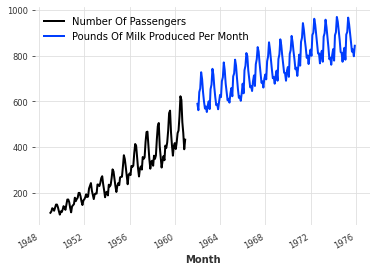

In [6]:
#plot chart
air_series.plot(label="Number Of Passengers")
milk_series.plot(label="Pounds Of Milk Produced Per Month" )
plt.legend()

### Preprocessing

In [7]:
# Scaling
from darts.dataprocessing.transformers import Scaler
# creating scaler object
scaler_air , scaler_milk = Scaler(), Scaler()
# perfoming the scaling
air_series_scaled = scaler_air.fit_transform(air_series)
milk_series_scaled = scaler_milk.fit_transform(milk_series)

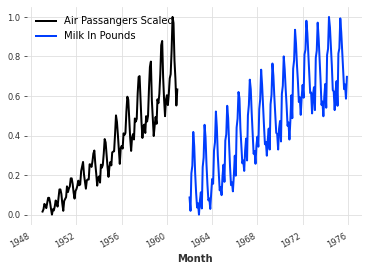

In [8]:
# View after scaling
# plottingair_ds.plot(label="Number Of Passengers")
air_series_scaled.plot(label = "Air Passangers Scaled")
milk_series_scaled.plot(label = "Milk In Pounds")
plt.legend()

### Train test split

In [10]:
air_series_train,  air_series_val = air_series_scaled[:-36], air_series_scaled[-36:] 
milk_series_train, milk_series_val = milk_series_scaled[:-36], milk_series_scaled[-36:]
print(f"The type of air passengers is {type(air_series_train)} and milk is {type(milk_series_train)} ")

The type of air passengers is <class 'darts.timeseries.TimeSeries'> and milk is <class 'darts.timeseries.TimeSeries'> 


### Creating a model - NBEATS

In [11]:
# importing model
from darts.models import NBEATSModel
print('model_loaded')
# creating a model object
model = NBEATSModel(input_chunk_length=24 , output_chunk_length=12, n_epochs = 100 , random_state = 15)
# fitting the model
model.fit([air_series_train, milk_series_train], verbose = True)

[2022-03-16 09:34:08,596] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2022-03-16 09:34:08,596] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2022-03-16 09:34:08,667] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-16 09:34:08,667] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-16 09:34:08,669] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Lightning Trainer parameters `enable_progress_bar`, `progress_bar_refresh_rate` and `enable_model_summary` in the `pl_trainer_kwargs` dict at model creation.
[2022-03-16 09:34:08,669] WARNING | darts.models.forecasting.torch_forecasting_model | Depreca

model_loaded
Epoch 99: 100%|██████████| 7/7 [00:01<00:00,  6.78it/s, loss=0.000647]


### Prediction and Evaluation

In [13]:
from darts.metrics import mape
pred_air = model.predict(n = 36, series = air_series_train)
pred_milk = model.predict(n =36, series = milk_series_train)
print("air Mape = {:.2f}%".format(mape(air_series_scaled , pred_air)))
print("milk Mape = {:.2f}%".format(mape(milk_series_scaled , pred_milk)))

Predicting: 7it [00:00, ?it/s]
Predicting: 7it [00:00, ?it/s]
air Mape = 8.91%
milk Mape = 21.73%


### Visualise predictions

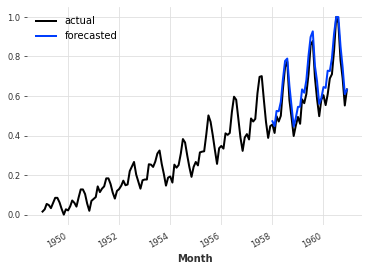

In [16]:
# plotting results
# Air
air_series_scaled .plot(label = "actual")
pred_air.plot(label = "forecasted") # validation data set
plt.legend()

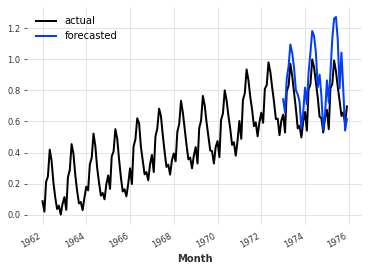

In [17]:
# plotting results
# Milk
milk_series_scaled .plot(label = "actual")
pred_milk.plot(label = "forecasted") # validation data set
plt.legend()